In [62]:
base_path = "/content/drive/My Drive/Colab Notebooks/DogsVsCats_Classifier"

In [63]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import transforms,datasets
from torch.utils.data import DataLoader
import numpy as np
from torch import optim
from zipfile import ZipFile

%matplotlib inline

In [64]:
with ZipFile(base_path + '/DogsCats.zip', 'r') as zipObj:
   zipObj.extractall(base_path)

In [99]:
w = 128
h = 128
classes = 2

transform = transforms.Compose([
    transforms.Resize((w,h)),
    #transforms.RandomRotation(30),
  #  transforms.RandomVerticalFlip(0.3),
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomResizedCrop(int(w)),
    transforms.ToTensor()])

train_data = datasets.ImageFolder(base_path + "/DogsCats/train",transform=transform)
test_data = datasets.ImageFolder(base_path + "/DogsCats/test",transform=transform)

In [100]:
train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=128,shuffle=False)

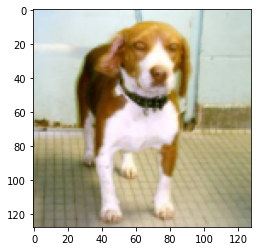

In [101]:
images,labels = next(iter(train_loader))
plt.imshow(np.rollaxis(images[0].numpy(), 0, 3))

In [102]:
model = nn.Sequential(
nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3), #OutDim = (128 - 3)/1 +1 = (3,32,126,126)
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,stride=2), #OutDim 126/2 = (3,32,63,63)
    
nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3), #Out Dim = (63-3)/1 +1 = 61 ,
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,stride=2), #OutDim 61/2 = 30,
nn.Dropout(0.25),
    
nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3), #Out Dim = (30-3)/1 +1 = 28 ,
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,stride=2), #OutDim 28/2 = 14,
             
nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3), #Out Dim = (14-3)/1 +1 = 12 ,
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,stride=2), #OutDim 12/2 = 6
nn.Dropout(0.25),

nn.Flatten(),
#nn.Dropout(0.5),
nn.Linear(in_features=256*6*6,out_features=2),
nn.LogSoftmax()
)

In [103]:
device = "cuda"
model.cuda()

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Dropout(p=0.25, inplace=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (11): ReLU()
  (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): Dropout(p=0.25, inplace=False)
  (14): Flatten()
  (15): Linear(in_features=9216, out_features=2, bias=True)
  (16): LogSoftmax(dim=None)
)

In [107]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

AttributeError: ignored

In [108]:
from sklearn.metrics import accuracy_score

def calc_test_accuracy():
    accuracies = []
    losses = []
    with torch.no_grad():
        for images,labels in iter(test_loader):
         #   images = images.to("cuda")
          #  labels = labels.to("cuda")
            output = model.cpu().forward(images)
            accuracies.append(accuracy_score(labels,output.max(dim =1)[1]))
            loss = criterion(output,labels)
            losses.append(loss.item())
    return np.mean(accuracies),np.mean(losses)

In [109]:
epochs = 30
print_every = 20
steps = 0

for e in range(epochs):
    running_loss = 0
    for images,labels in iter(train_loader):
        images = images.to("cuda")
        labels = labels.to("cuda")
        steps+= 1
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0
    test_acc,test_loss = calc_test_accuracy()
    model.cuda()
    print("Testing set accuracy: " + str(test_acc) +", Testing set loss:" + str(test_loss))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch: 1/30...  Loss: 0.6884
Epoch: 1/30...  Loss: 0.6856
Epoch: 1/30...  Loss: 0.6652
Epoch: 1/30...  Loss: 0.6582
Epoch: 1/30...  Loss: 0.6400
Epoch: 1/30...  Loss: 0.6197
Epoch: 1/30...  Loss: 0.6625
Epoch: 1/30...  Loss: 0.6339
Epoch: 1/30...  Loss: 0.6179
Epoch: 1/30...  Loss: 0.5905
Epoch: 1/30...  Loss: 0.5981
Epoch: 1/30...  Loss: 0.6187
Epoch: 1/30...  Loss: 0.6004
Epoch: 1/30...  Loss: 0.5716
Epoch: 1/30...  Loss: 0.5698
Epoch: 1/30...  Loss: 0.5636
Testing set accuracy: 0.7013075086805556, Testing set loss:0.5705238096415997
Epoch: 2/30...  Loss: 0.3388
Epoch: 2/30...  Loss: 0.5679
Epoch: 2/30...  Loss: 0.5708
Epoch: 2/30...  Loss: 0.5472
Epoch: 2/30...  Loss: 0.5127
Epoch: 2/30...  Loss: 0.5506
Epoch: 2/30...  Loss: 0.5204
Epoch: 2/30...  Loss: 0.5123
Epoch: 2/30...  Loss: 0.5461
Epoch: 2/30...  Loss: 0.5716
Epoch: 2/30...  Loss: 0.5313
Epoch: 2/30...  Loss: 0.5277
Epoch: 2/30...  Loss: 0.5188
Epoch: 2/30...  Loss: 0.5232
Epoch: 2/30...  Loss: 0.5197
Epoch: 2/30...  Loss: 0

In [110]:
torch.save(model.state_dict(),base_path + "/DogCats_model.dict")